In [1]:
# Importing the necessary module to mount Google Drive
from google.colab import drive

# Mounting Google Drive to access files from Google Drive
# This will prompt you to authorize access to your Google Drive account
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=926a1060cc34f368ddbeab33a3b9a97bbbecab64ed51f568c344f9cd4eab20f3
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [3]:
from keras.applications.xception import preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
from lime import lime_image
import time
import cv2
from skimage.segmentation import mark_boundaries


In [4]:
# Load your model
model = load_model('/content/drive/My Drive/checkpoints/Xception/model3_e88_26/model_epoch_10_val_accuracy_1.0000.h5')

In [20]:
def custom_preprocess_input(images):
    return images / 255.0  # Scale pixel values to [0, 1]

# Update the predict_fn to use the custom preprocessing
def predict_fn(images):
    processed_images = custom_preprocess_input(images)
    return model.predict(processed_images)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 36ms/step
Prediction: 6.809065811186343e-11
Predicted class: Fake


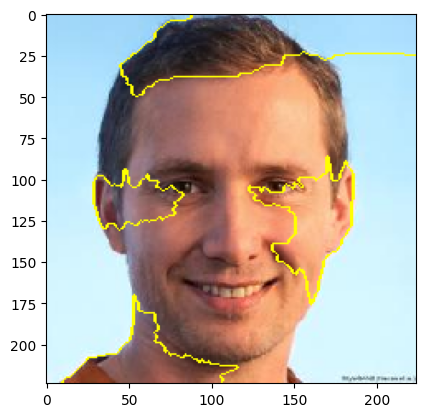

In [30]:
explainer = lime_image.LimeImageExplainer()

# Select an image to explain
image_to_explain = '/content/drive/My Drive/data/test/fake/photo_3327.jpg'

# Load the image and convert it to a numpy array
img = image.load_img(image_to_explain, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Rescale the image

# Generate an explanation for the image using LIME
explanation = explainer.explain_instance(
    img_array[0].astype('double'),
    predict_fn,
    top_labels=1,
    hide_color=0,
    num_samples=1000
)

# Visualize the explanation
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=5,
    hide_rest=False
)
annotated_image = mark_boundaries(temp, mask)

# Get the model's prediction
prediction = model.predict(img_array)
predicted_class = 'Real' if prediction[0][0] > 0.5 else 'Fake'
print(f'Prediction: {prediction[0][0]}')
print(f'Predicted class: {predicted_class}')

# Display the annotated image with the prediction
plt.imshow(annotated_image)
plt.show()


In [13]:
from keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = '/content/drive/My Drive/data/test/fake/photo_2839.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Rescale the image

# Make a prediction
prediction = model.predict(img_array)
predicted_class = 'Real' if prediction[0][0] > 0.5 else 'Fake'
print(f'Prediction: {prediction[0][0]}')
print(f'Predicted class: {predicted_class}')


1/1 [==============================] - 0s 25ms/step
Prediction: 8.276475479355311e-14
Predicted class: Fake


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 33ms/step
Prediction: 1.0
Predicted class: Real


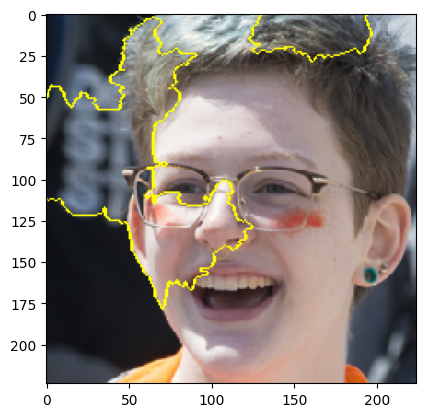

In [31]:
explainer = lime_image.LimeImageExplainer()

# Select an image to explain
image_to_explain = '/content/drive/My Drive/data/test/real/64139.png'

# Load the image and convert it to a numpy array
img = image.load_img(image_to_explain, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Rescale the image

# Generate an explanation for the image using LIME
explanation = explainer.explain_instance(
    img_array[0].astype('double'),
    predict_fn,
    top_labels=1,
    hide_color=0,
    num_samples=1000
)

# Visualize the explanation
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=5,
    hide_rest=False
)
annotated_image = mark_boundaries(temp, mask)

# Get the model's prediction
prediction = model.predict(img_array)
predicted_class = 'Real' if prediction[0][0] > 0.5 else 'Fake'
print(f'Prediction: {prediction[0][0]}')
print(f'Predicted class: {predicted_class}')

# Display the annotated image with the prediction
plt.imshow(annotated_image)
plt.show()